In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Motivating Random Forests : Decision Trees

In [2]:
# Creating a decision tree

In [3]:
from sklearn.datasets import make_blobs

In [7]:
make_blobs

<function sklearn.datasets.samples_generator.make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)>

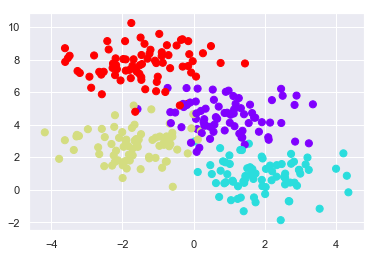

In [4]:
X,y = make_blobs(n_samples = 300, centers =4, random_state = 0, cluster_std=1.0)
plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap='rainbow')

Decision tree

In [8]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X,y)

In [13]:
# utility function to visualize the output of classifer

def visualize_classifer(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:,0], X[:,1], c=y, s=30, cmap = cmap, clim=(y.min(), y.max()), zorder =3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    
    model.fit(X,y)
    xx,yy = np.meshgrid(np.linspace(*xlim, num=200),
                       np.linspace(*ylim, num=200))                 # decision boundary
    Z= model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)   # predicting on the grids / decision boundary
    
    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha =0.3,
                          levels = np.arange(n_classes+1)  -0.5 ,
                          cmap = cmap, cim = (y.min(), y.max()), zorder=1 )
    
    ax.set(xlim=xlim, ylim=ylim)
    

C:\Users\iGuest\Anaconda3\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'cim'
  s)


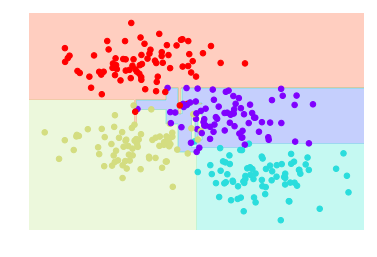

In [14]:
visualize_classifer(DecisionTreeClassifier(), X, y)

## Ensembles of Estimators : Random Forests

In [15]:
# bagging classification

from sklearn.ensemble import BaggingClassifier

In [19]:
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators =100, max_samples = 0.8, random_state=1)

In [20]:
bag.fit(X,y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.8, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

C:\Users\iGuest\Anaconda3\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'cim'
  s)


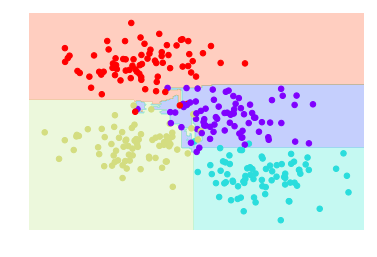

In [21]:
visualize_classifer(bag, X,y)

In the above case, we have randomized the data by fitting each estimator with a random subset of 80% of training points...
In practice, decision trees are more effectively randomized when some stochasticity is injected in how the splits are chosen; 
this way all the data contributes to the fit each time, but the result sof the fit still have the desired randomness.

#### Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
model = RandomForestClassifier(n_estimators=100, random_state=0)

C:\Users\iGuest\Anaconda3\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'cim'
  s)


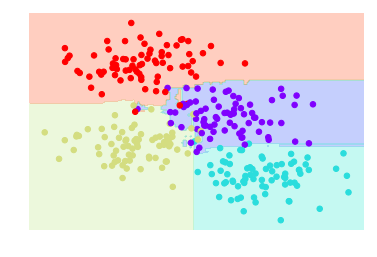

In [25]:
visualize_classifer(model, X, y)